In [4]:
%load_ext autoreload
%autoreload 2

import plots
import runner
import analysis

/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models
/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/plots_out


# Exploration

This Notebook is used to explore different parameter settings manually.

# Base Model of Single EI Population

This base model should show a PING mechanism. Activity should lie around 40 Hz and upwards, thus displaying gamma band activity.
Excitatory and inhibitory groups should be strongly synchronized.

No hyperbursts, no anomalies.


In [5]:
params = {
 "J_itoi": 3.0,
 "J_etoe": 0.1
}

model = runner.run(modified_params=params, file_name="base")

initializing net ...
initialization time: 0.1635589599609375s
------------------ running network!
runtime: 6.9


INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


In [6]:
if 'model' not in locals() or model is None:
    model = analysis.load_model("base")

Generate PSD plot ...


(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1382daac8>)

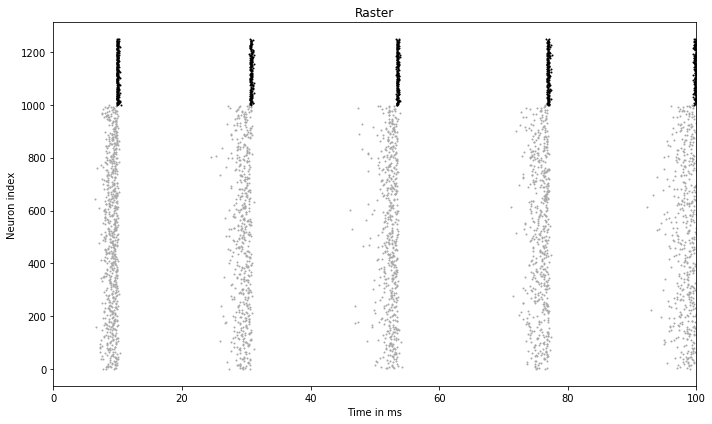

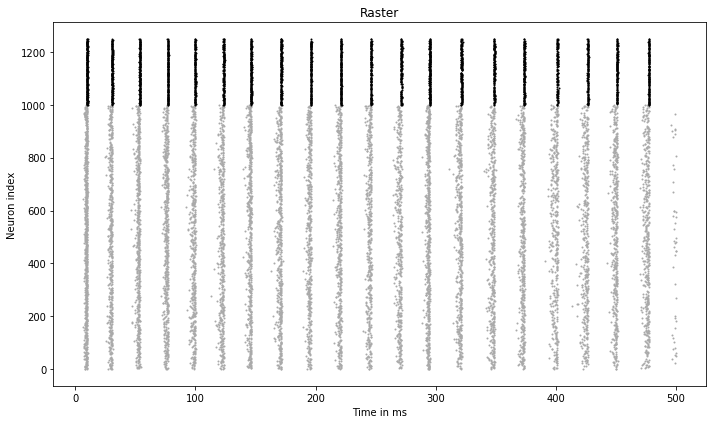

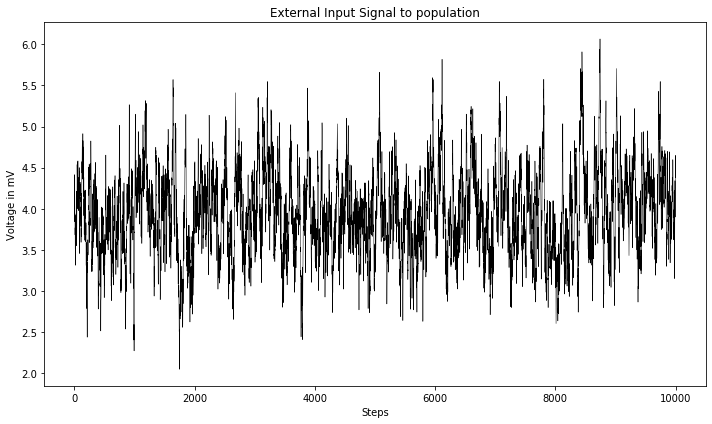

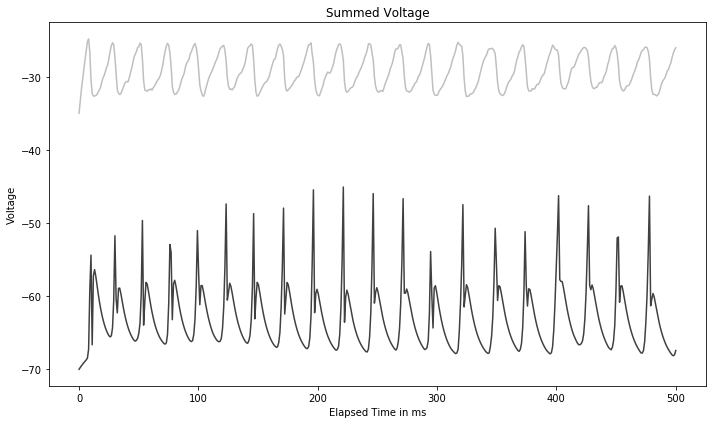

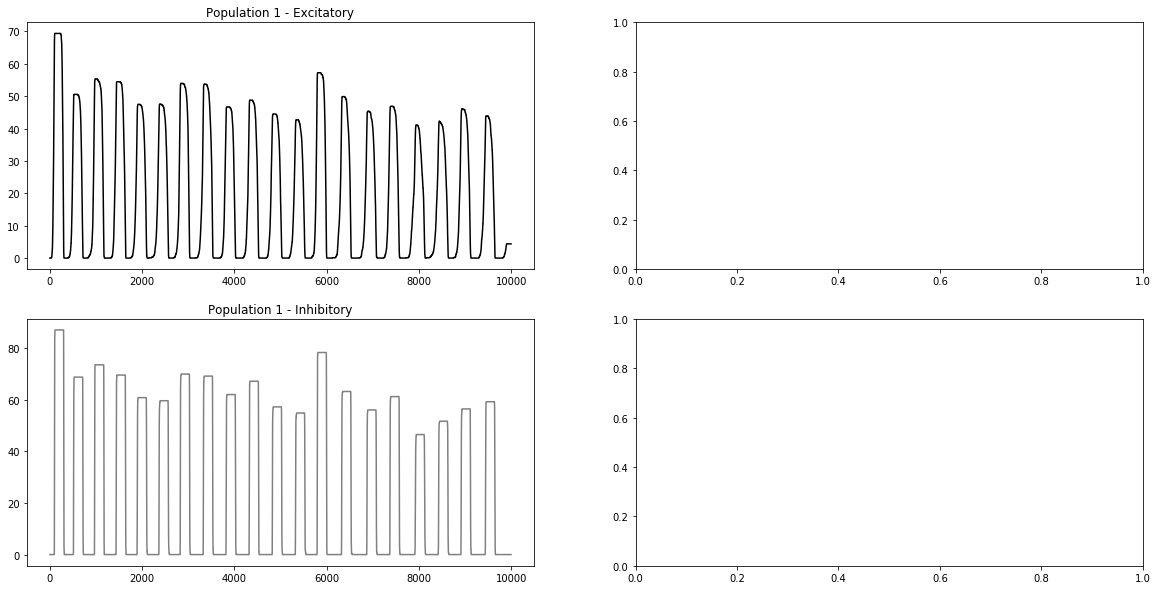

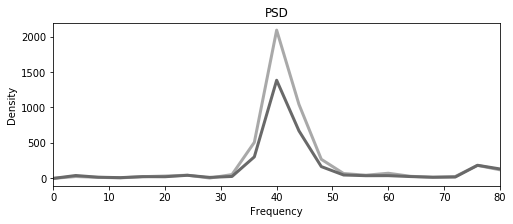

In [7]:
plots.raster(model=model, x_left=0, x_right=100)
plots.raster(model=model)
plots.ou_noise_by_params(params=model["params"])
plots.lfp(model=model)
plots.population_rates(model)
plots.psd("PSD", model)

# Force Gamma frequency

To what value should mean of external signal be set to?
Neural Oscillations should behave like a PING rhythm.

Result: set mean to 10!

PSD shows peak frequency around 30-40H Hz.

In [8]:
params = {
    'runtime': 500, 
    'J_etoe': 0.1,
    'J_itoe': 15.,
    'J_etoi': 0.5,
    'J_itoi': 0.05,
    'ou_mu': {
        'ou_mean': 2
    }
}

model = runner.run(modified_params=params)

initializing net ...
initialization time: 0.12837791442871094s
------------------ running network!
runtime: 6.7


INFO       Overwriting environment variable "DYLD_LIBRARY_PATH" [brian2.devices.cpp_standalone.device.overwritten_env_var]


Generate PSD plot ...


(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x135d19630>)

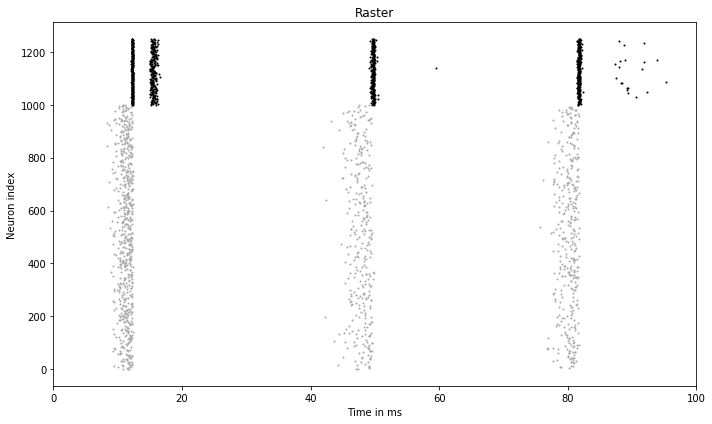

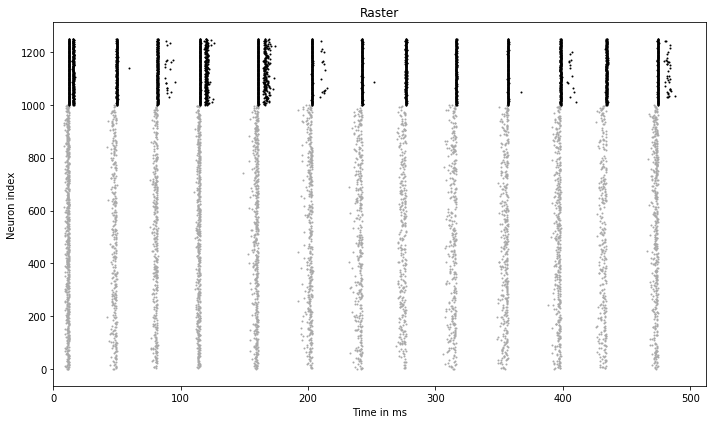

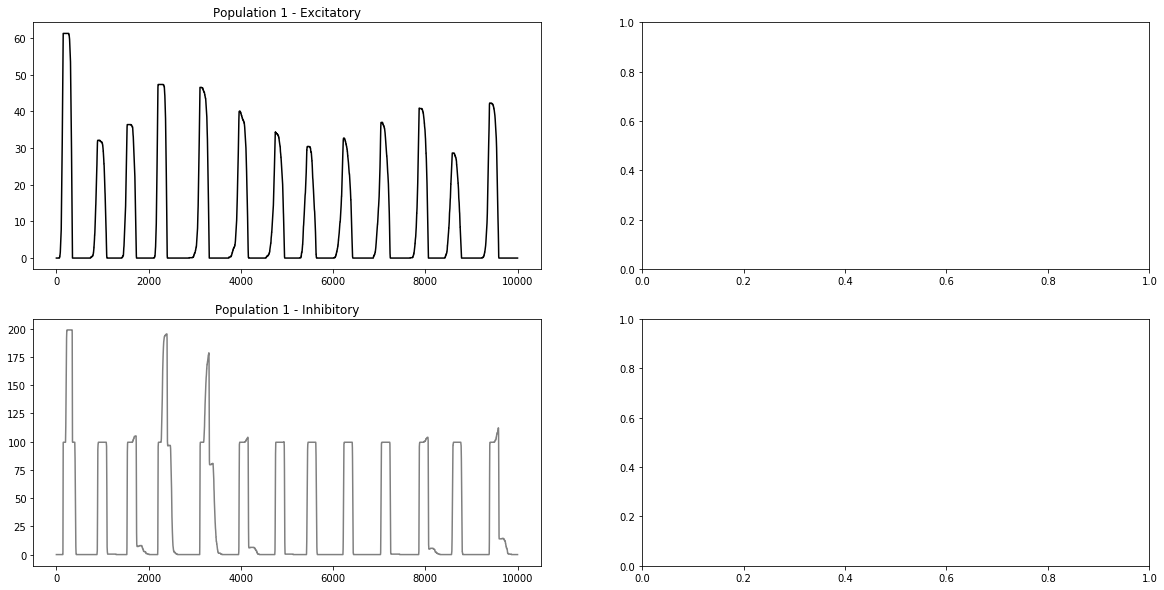

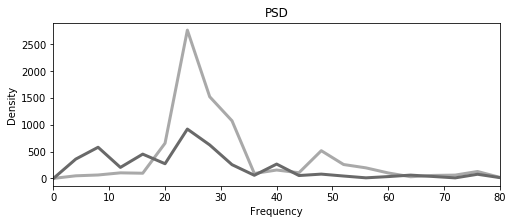

In [9]:
# plots.ou_noise_by_params(params)
plots.raster(model=model, x_left=0, x_right=100)
plots.raster(model=model, x_left=0)
plots.population_rates(model)
plots.psd("PSD", model)

In [10]:
params = {
    "runtime": 500, 
    'J_etoe': 0.01,
    'J_itoe': 10.,
    'J_etoi': 0.8,
    'J_itoi': 0.15,
    'ou_mu': {
        'ou_mean': 3
    }
}

model = runner.run(modified_params=params)

initializing net ...
initialization time: 0.14110398292541504s
------------------ running network!
runtime: 7.2


Generate PSD plot ...


(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1384947b8>)

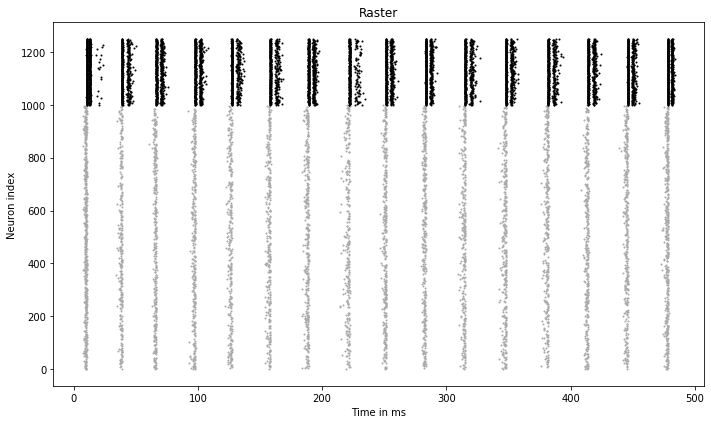

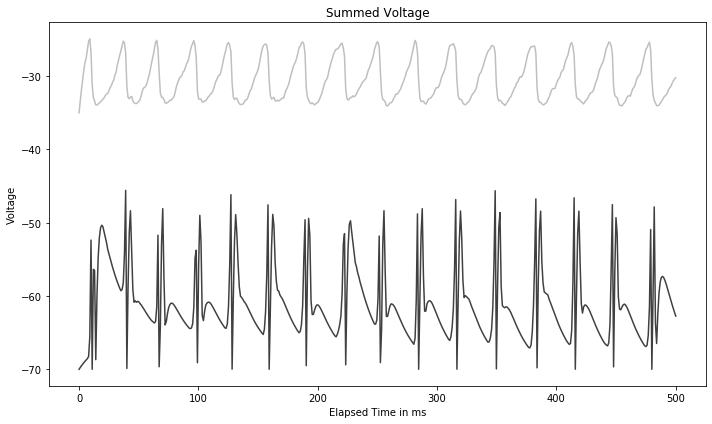

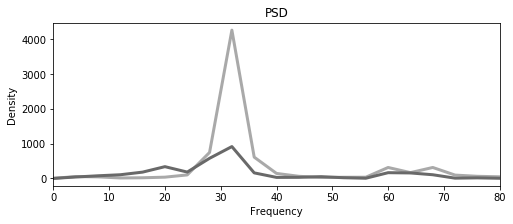

In [11]:
# plots.ou_noise_by_params(params)
plots.raster(model=model)
plots.lfp(model=model)
# plots.population_rates(model)
plots.psd("PSD", model)


initializing net ...
initialization time: 0.13543391227722168s
------------------ running network!
runtime: 7.2
Generate PSD plot ...


(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1386ea400>)

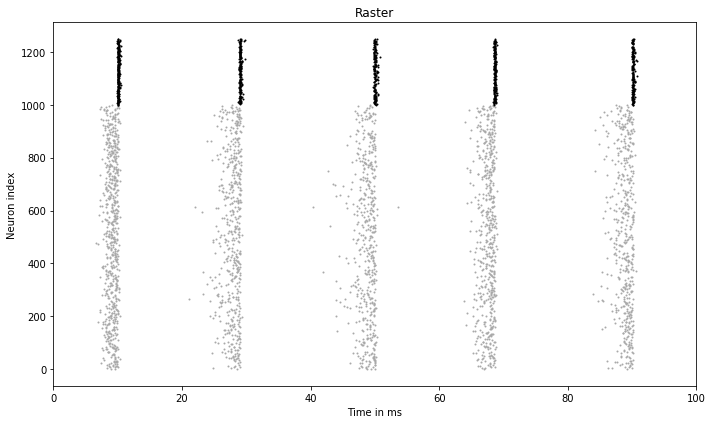

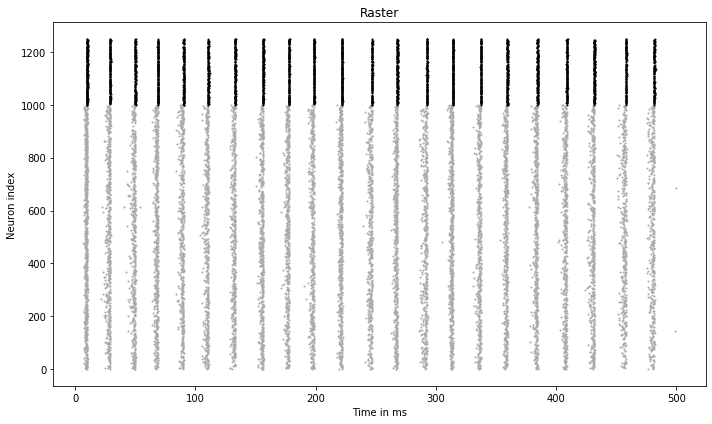

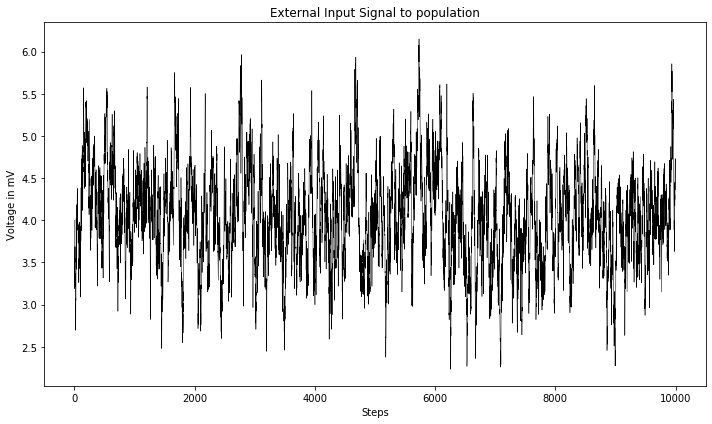

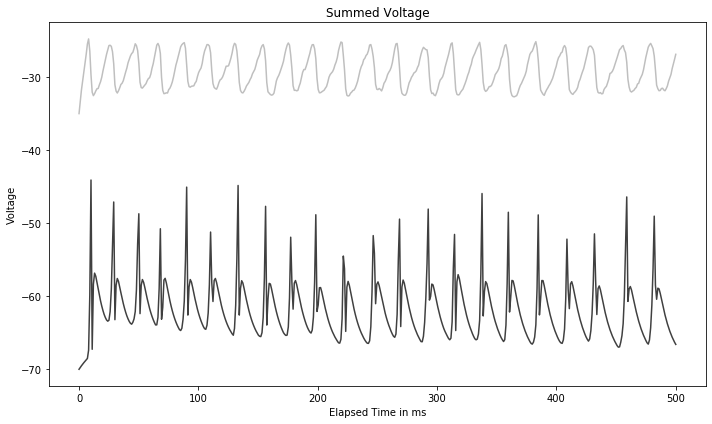

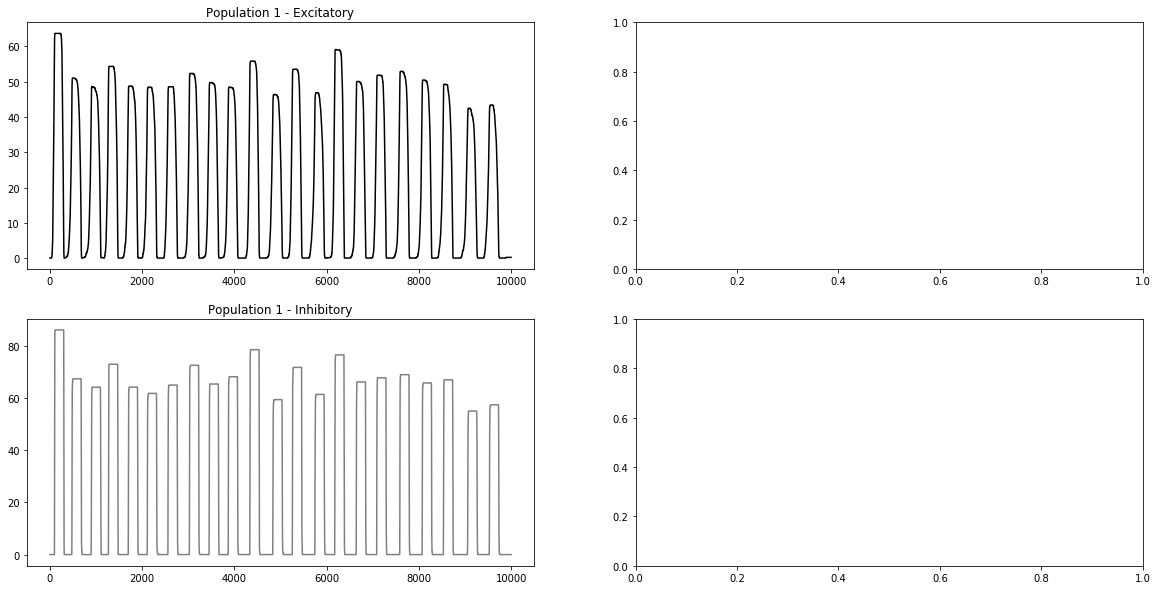

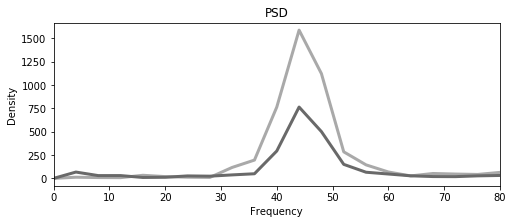

In [12]:
model = runner.run(modified_params={'tau_GABA': 5.0})

plots.raster(model=model, x_left=0, x_right=100)
plots.raster(model=model)
plots.ou_noise_by_params(params=model["params"])
plots.lfp(model=model)
plots.population_rates(model)
plots.psd("PSD", model)


# Finding appropiate value for GABA decay time.

In [13]:
models = [
    runner.run(modified_params={'tau_GABA': 3.0}),
    runner.run(modified_params={'tau_GABA': 5.0}),
    runner.run(modified_params={'tau_GABA': 7.0}),
    runner.run(modified_params={'tau_GABA': 9.0})
]

initializing net ...
initialization time: 0.1481189727783203s
------------------ running network!
runtime: 6.7
initializing net ...
initialization time: 0.1506807804107666s
------------------ running network!
runtime: 6.2
initializing net ...
initialization time: 0.12795400619506836s
------------------ running network!
runtime: 6.4
initializing net ...
initialization time: 0.12782883644104004s
------------------ running network!
runtime: 6.8


Generate PSD plot ...
Generate PSD plot ...
Generate PSD plot ...
Generate PSD plot ...


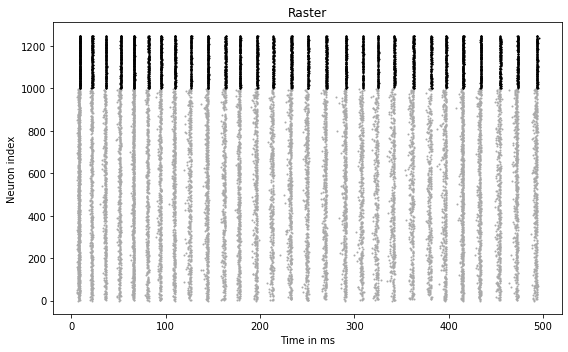

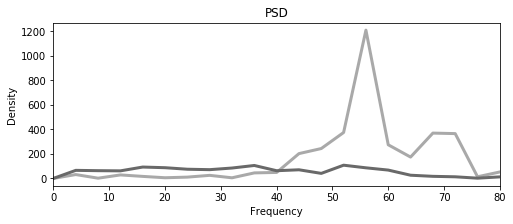

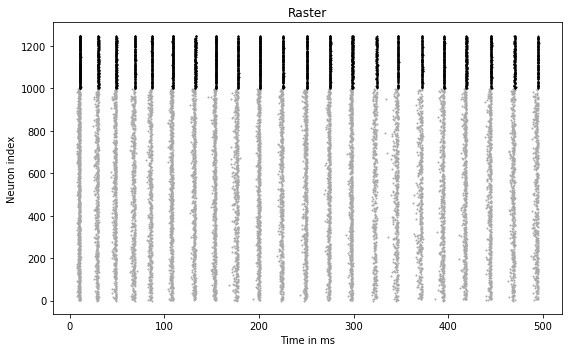

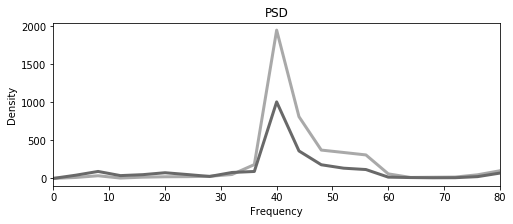

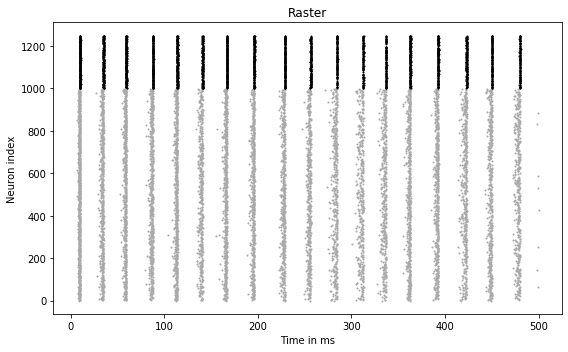

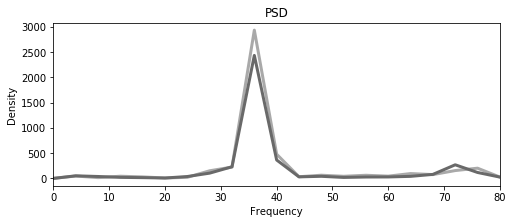

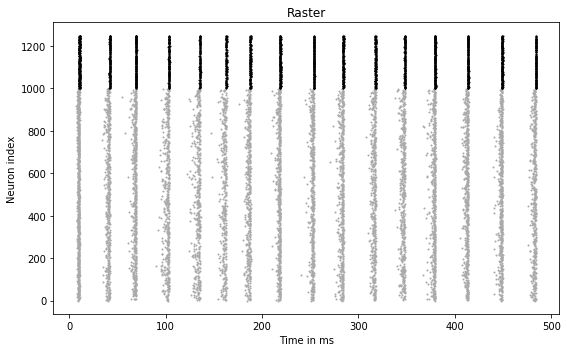

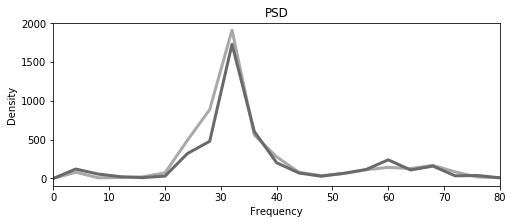

In [14]:
FIG_SIZE = (8, 5)
for model in models:
    plots.raster(model=model, fig_size=FIG_SIZE)
    plots.psd("PSD", model)
    